# Redes Bayesianas
Las redes Bayesianas corresponden a un caso particular de factorización de una probabilidad conjunto en que cada factor es también una distribución.

El criterio para detectar independencia entre condicional en un grafo probabilístico corresponde a la d-separación, que nos dice que si $x_i$ y $x_j$ están bloqueados por un subconjunto $S \in X \setminus \{x_i,x_j\}$ de las variables, entonces $x_i$ es independiente de $x_j$ dado $S$. Esto nos lleva también a concluir que en un árbol, cada variable $x_i$ es independiente de sus hijos y sus abuelos, dado el valor de las variables en el conjunto $S$ que contiene a sus padres. 


En general, podemos decir que podemos garantizar que $x_i \perp x_j \vert S$,si no existe ninguna ruta activa entre ambos vertices. Una ruta se dice activa si todas las tripletas que la componen se encuentran activas.

In [2]:
! pip install --user pgmpy
! pip install --user  wget

  Using cached https://files.pythonhosted.org/packages/68/6b/661a65aa7788f3aff7228ba81625c540917d656f41e3eb031c6d60b0a25d/pgmpy-0.1.10-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/8f/dd6a8e85946def36e4f2c69c84219af0fa5e832b018c970e92f2ad337e45/networkx-2.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/13/70/54e9fb010fe1547bc4774716f11ececb81ae5b306c05f090f4461ee13205/torch-1.5.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cb/83/540fd83238a18abe6c2d280fa8e489ac5fcefa1f370f0ca1acd16ae1b860/statsmodels-0.11.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.

In [13]:
import pgmpy
from pgmpy.readwrite import BIFReader

In [14]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('P', 'H'), ('U', 'A'), ('P', 'U'), ('D', 'U')])

# Defining individual CPDs.
cpd_p = TabularCPD(variable='P', variable_card=2, values=[[0.8, 0.2]])
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6, 0.4]])



cpd_u = TabularCPD(variable='U', variable_card=2,
                        values=[[0.99, 0.1,0.1,0.001],
                               [0.01,0.9,0.9,0.999]],
                        evidence=['P', 'D'],
                        evidence_card=[2, 2])

cpd_a = TabularCPD(variable='A', variable_card=2,
                      values=[[0.5,0.05],
                              [0.5,0.95],],
                      evidence=['U'], evidence_card=[2])
cpd_h = TabularCPD(variable='H', variable_card=2,
                      values=[[0.8, 0.1],
                              [0.2,0.9]],
                      evidence=['P'], evidence_card=[2])

# Associating the CPDs with the network
model.add_cpds(cpd_p, cpd_d, cpd_u,cpd_a,cpd_h)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()

True

In [15]:
print(cpd_p)

+------+-----+
| P(0) | 0.8 |
+------+-----+
| P(1) | 0.2 |
+------+-----+


In [16]:
print(cpd_d)

+------+-----+
| D(0) | 0.6 |
+------+-----+
| D(1) | 0.4 |
+------+-----+


In [17]:
print(cpd_u)


+------+------+------+------+-------+
| P    | P(0) | P(0) | P(1) | P(1)  |
+------+------+------+------+-------+
| D    | D(0) | D(1) | D(0) | D(1)  |
+------+------+------+------+-------+
| U(0) | 0.99 | 0.1  | 0.1  | 0.001 |
+------+------+------+------+-------+
| U(1) | 0.01 | 0.9  | 0.9  | 0.999 |
+------+------+------+------+-------+


In [18]:
print(cpd_h)

+------+------+------+
| P    | P(0) | P(1) |
+------+------+------+
| H(0) | 0.8  | 0.1  |
+------+------+------+
| H(1) | 0.2  | 0.9  |
+------+------+------+


In [19]:
print(cpd_a)

+------+------+------+
| U    | U(0) | U(1) |
+------+------+------+
| A(0) | 0.5  | 0.05 |
+------+------+------+
| A(1) | 0.5  | 0.95 |
+------+------+------+


In [20]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
p_dist = infer.query(['P'])
print(p_dist)

Eliminating: D: 100%|██████████| 4/4 [00:00<00:00, 538.58it/s]

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.8000 |
+------+----------+
| P(1) |   0.2000 |
+------+----------+


In [23]:
# P(p|a=1,h=1)
print(infer.query(['P'], evidence={'A': 1, 'H': 1}))

Eliminating: D: 100%|██████████| 2/2 [00:00<00:00, 420.59it/s]

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3903 |
+------+----------+
| P(1) |   0.6097 |
+------+----------+


In [27]:
print(infer.query(['U'], evidence={'P': 1}))

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 527.25it/s]

+------+----------+
| U    |   phi(U) |
+======+==========+
| U(0) |   0.0604 |
+------+----------+
| U(1) |   0.9396 |
+------+----------+


In [28]:
# phi_d(p=0)
print(infer.query(['U'], evidence={'P': 0}))

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 597.37it/s]

+------+----------+
| U    |   phi(U) |
+======+==========+
| U(0) |   0.6340 |
+------+----------+
| U(1) |   0.3660 |
+------+----------+


In [38]:
# phi_d(u,p=1)
print(infer.query(['U'], evidence={'P': 1}))

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 670.23it/s]

+------+----------+
| U    |   phi(U) |
+======+==========+
| U(0) |   0.0604 |
+------+----------+
| U(1) |   0.9396 |
+------+----------+


In [30]:
# phi_a(a,p=1)
print(infer.query(['A'], evidence={'P': 1}))

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 390.58it/s]

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.0772 |
+------+----------+
| A(1) |   0.9228 |
+------+----------+


In [40]:
# phi_d(u,p=0)
print(infer.query(['U'], evidence={'P': 0}))

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 710.18it/s]

+------+----------+
| U    |   phi(U) |
+======+==========+
| U(0) |   0.6340 |
+------+----------+
| U(1) |   0.3660 |
+------+----------+


In [41]:
# phi_a(a,p=0)
print(infer.query(['A'], evidence={'P': 0}))

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 521.31it/s]

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.3353 |
+------+----------+
| A(1) |   0.6647 |
+------+----------+


In [42]:
print(infer.query(['P'], evidence={'A': 1, 'H': 1}))

Eliminating: D: 100%|██████████| 2/2 [00:00<00:00, 501.29it/s]

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3903 |
+------+----------+
| P(1) |   0.6097 |
+------+----------+


In [47]:
p1=0.9*0.2*0.9228
p2=0.2*0.8*0.6647
p3=p1/(p1+p2)
print('p(h=1|p=1)p(p=1)phi_u(a=1,p=1)={0:0.2f}'.format(p1))
print('p(h=1|p=0)p(p=0)phi_u(a=1,p=0)={0:0.2f}'.format(p2))
print('p(p=1|h=1,a=1)={0:0.4f}'.format(p3))

p(h=1|p=1)p(p=1)phi_u(a=1,p=1)=0.17
p(h=1|p=0)p(p=0)phi_u(a=1,p=0)=0.11
p(p=1|h=1,a=1)=0.6097


# Red Asia

In [1]:
import wget
import gzip
f = wget.download('http://www.bnlearn.com/bnrepository/asia/asia.bif.gz')
with gzip.open('asia.bif.gz', mode='rb') as f:
    file_content=f.read()
with open('asia.bif', mode='wb') as f:
    f.write(file_content)

In [2]:
from pgmpy.readwrite import BIFReader
reader = BIFReader('asia.bif')
!rm asia.bif
!rm asia.bif.gz
model = reader.get_model()

In [6]:
#reader=BIFReader('data/asia.bif')
#model=reader.get_model()

In [3]:
model.nodes()

NodeView(('asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'))

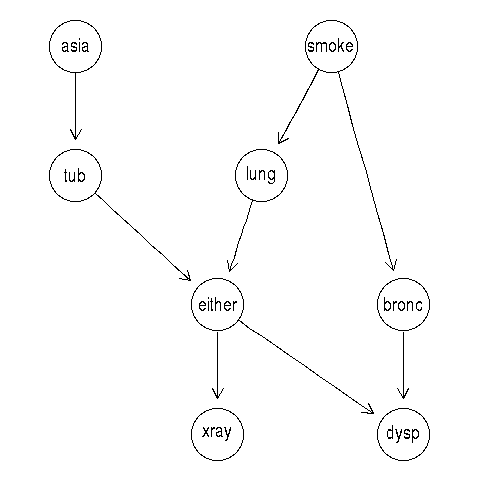

In [4]:
from IPython.display import Image
Image('data/asia.png')

In [8]:
model.is_active_trail('tub', 'smoke', observed='dysp')

True

In [9]:
model.is_active_trail('tub', 'smoke')

False

In [6]:
model.is_active_trail('lung', 'bronc', observed='smoke')

False

In [7]:
model.is_active_trail('asia', 'smoke', observed='lung')

False

In [8]:
model.is_active_trail('asia', 'smoke', observed=['lung','dysp'])

True

In [12]:
model.get_independencies()

(asia _|_ lung, bronc, smoke)
(asia _|_ xray | either)
(asia _|_ bronc, smoke | lung)
(asia _|_ bronc, lung | smoke)
(asia _|_ lung, smoke | bronc)
(asia _|_ bronc, either, xray, dysp, lung, smoke | tub)
(asia _|_ dysp, xray, bronc, smoke | either, lung)
(asia _|_ dysp, xray, bronc | either, smoke)
(asia _|_ xray | dysp, either)
(asia _|_ dysp, xray | either, bronc)
(asia _|_ bronc, xray, dysp, lung, smoke | either, tub)
(asia _|_ bronc, smoke | xray, lung)
(asia _|_ bronc | lung, smoke)
(asia _|_ smoke | bronc, lung)
(asia _|_ xray, either, dysp, bronc, smoke | lung, tub)
(asia _|_ bronc | xray, smoke)
(asia _|_ bronc, either, dysp, lung, smoke | xray, tub)
(asia _|_ lung | bronc, smoke)
(asia _|_ bronc, xray, either, dysp, lung | tub, smoke)
(asia _|_ bronc, xray, either, lung, smoke | dysp, tub)
(asia _|_ xray, either, dysp, lung, smoke | bronc, tub)
(asia _|_ dysp, bronc, smoke | xray, either, lung)
(asia _|_ dysp, xray, bronc | either, lung, smoke)
(asia _|_ xray, bronc, smoke | d

In [13]:
model.local_independencies('tub')

(tub _|_ lung, bronc, smoke | asia)

In [12]:
model.is_active_trail('lung', 'tub', observed='either')

True